# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/foodhub_order.csv')

In [205]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [206]:
# Write your code here
df.shape
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:

There are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [207]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

All the columns have 1898 observations
Columns: restaurant_name,cuisine_type, day_of_the_week, rating are 'object' type contain categories in them.
Coluymns: food_preparation_time, delivery_time, order_id, customer_id are int type and cost of order column is float.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [208]:
# Write your code here
print(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
There are no missing data in this dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [209]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898,NaN,NaN,NaN,1.4775e+06,548.05,1.47655e+06,1.47702e+06,1.4775e+06,1.47797e+06,1.47844e+06
customer_id,1898,NaN,NaN,NaN,171168,113698,1311,77787.8,128600,270525,405334
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898,NaN,NaN,NaN,16.4989,7.48381,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898,NaN,NaN,NaN,27.372,4.63248,20,23,27,31,35
delivery_time,1898,NaN,NaN,NaN,24.1617,4.97264,15,20,25,28,33


#### Observations:
from the table above we can see that it takes for food to be prepared once an order is placed:
the minimum time- 20 min,
the average time- 27 min,
the maximum time- 35 min

### **Question 5:** How many orders are not rated? [1 mark]

In [210]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
There are:
736 orders with  - "not given" rating
588 orders with rating 5  
386 orders with rating 4
188 orders with rating 3

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Observation on rating

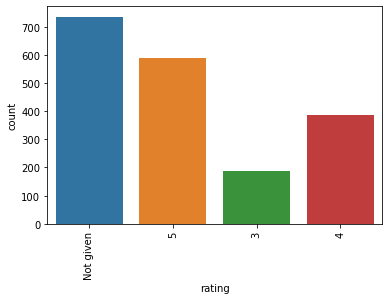

In [211]:
sns.countplot(data=df, x='rating')
plt.xticks(rotation=90);

In [402]:
df['rating'].nunique()

4

### observation 
on rating: We can see that there are 4 grades: with the rating 'not given around 730, with rating '5' - 580, with rating '4' - 386, with rating '3' -188

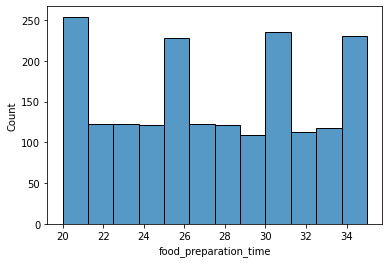

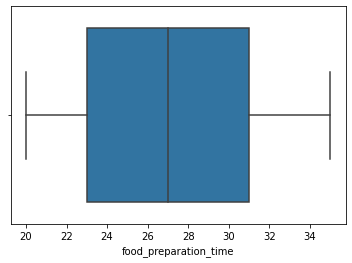

In [212]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observation on food preparation time
food preparation time takes in 20min, max 35, average 27min

#### observation delivery_time:

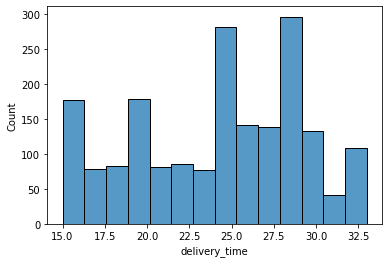

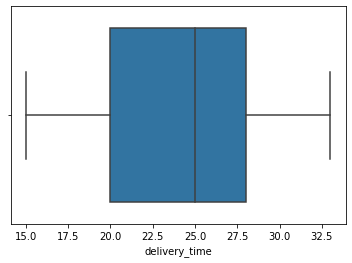

In [144]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

### Observation
delivery_time min 15, max 33, 25 - is an avg

#### Observation on cost_of_the_order

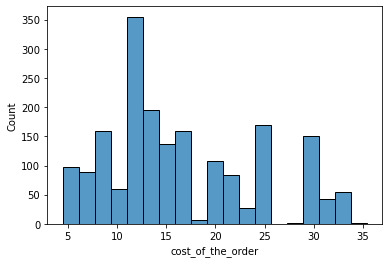

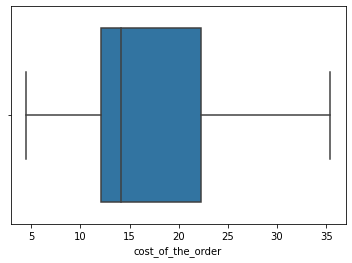

In [145]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

### observation
cost of order:
avg = 14$,
min = 4$, 
max = 35$

#### Observation of categorical values

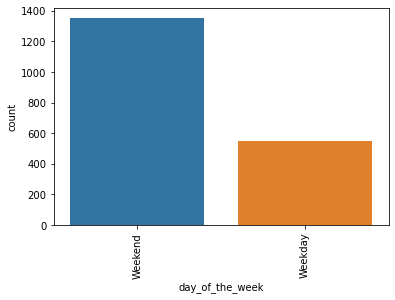

In [103]:
sns.countplot(data=df, x='day_of_the_week')
plt.xticks(rotation=90);

In [400]:
df['cuisine_type'].nunique()

14

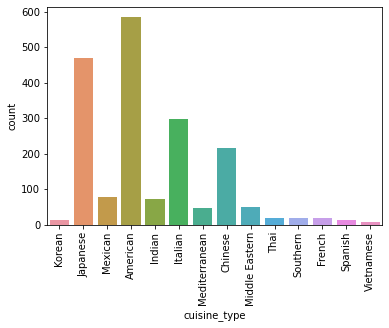

In [104]:
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90);

#### Observation 
There are 14 different quisines, where  American 580, Japanese 480, Italian 300 and Chinese 210 are the most popupar one

In [398]:
df['customer_id'].nunique()

1200

#### Observation on customer id
We have 1200 unique customer id

In [399]:
df['restaurant_name'].nunique()

178

#### Observation on restaurants
we have 178 restaurants

In [401]:
df['order_id'].nunique()

1898

#### Observation on Order ID
1898 unique order_ids

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [218]:
# Write the code here
df.groupby('restaurant_name',as_index=False).agg({'order_id':'count'}).sort_values('order_id', ascending=False).head(5)

,restaurant_name,order_id
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68


#### Observation 
top 5 restaurants in terms of the number of orders received: Shake Shack 219orders, The Meatball Shop	132, Blue Ribbon Sushi	119, Blue Ribbon Fried Chicken	96, Parm	68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

<AxesSubplot:xlabel='count', ylabel='cuisine_type'>

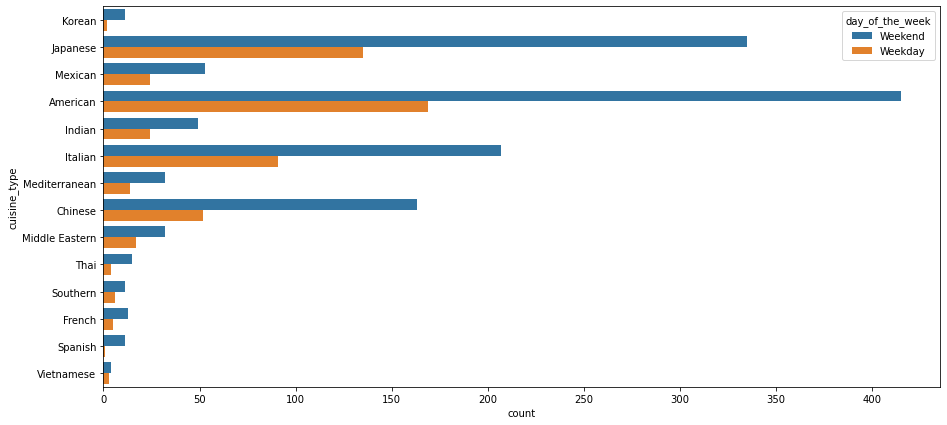

In [563]:
# # Write the code here
plt.figure(figsize=(15,7))
sns.countplot(y = df['cuisine_type'],
                  hue = df['day_of_the_week'])
            


In [592]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Middle Eastern     32
Mediterranean      32
Thai               15
French             13
Spanish            11
Southern           11
Korean             11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
the most popular cuisine on weekend is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [403]:
# Write the code
perc=df.loc[df['cost_of_the_order']>20]
perc

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,0,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,0,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


In [108]:
perc=perc.sum()
perc

555

In [109]:
total_ord=len(df['cost_of_the_order'])
total_ord


1898

In [110]:
perc_of_ord = (perc/total_ord) * 100
perc_of_ord

29.24130663856691

#### Observations:
29% of orders cost more than 20 $

### **Question 10**: What is the mean order delivery time? [1 mark]

In [147]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
Mean of delivery_time is 24 min

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [270]:
# Write the code here
top_three = df.groupby(['customer_id'])['customer_id'].value_counts().sort_values(ascending=False).head(3)
top_three

customer_id  customer_id
52832        52832          13
47440        47440          10
83287        83287           9
Name: customer_id, dtype: int64

#### Observations:


20% discount will get top 3 frequent customers:
    customer_id     number_of_orders
       52832          13
       47440          10
       83287           9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


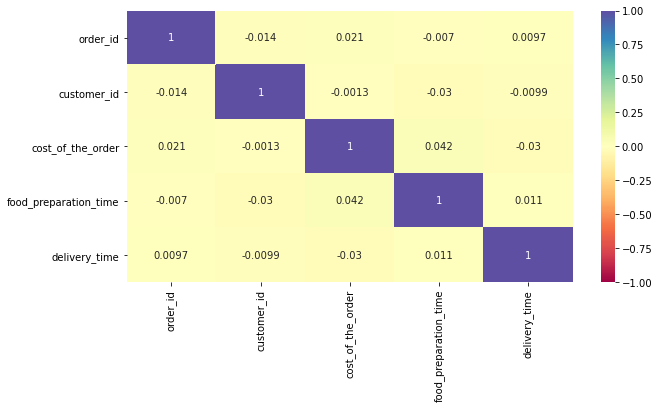

In [247]:
# # Write the code here
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

### Observation
still there is low positive correlation between:
food_preparation_time and cost_of_the_order,
food preparation time and delivery time, 
order_id and cost_of_the_order
delivery_time and order_id.
So we need to see exactly.



I would like to see correlation with rating

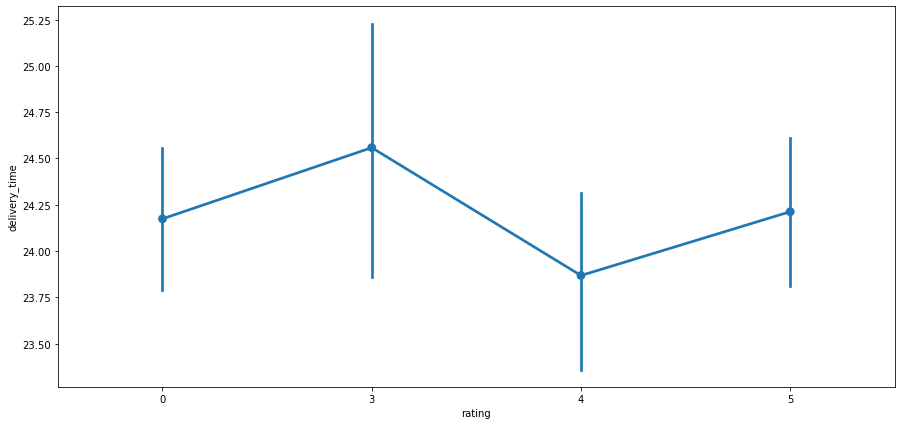

In [404]:
# rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observation on rating and delivery time
we can see that with 0 rating delivery time is between 23.75 to 24.60 and avg 24.20
rating 3 between 23.75 and25.25, avg 24.50,
rating 4 between below 23.50 and 24.40, avg 23.80,
rating 5 between 23.75 and 24.60, avg 24.15

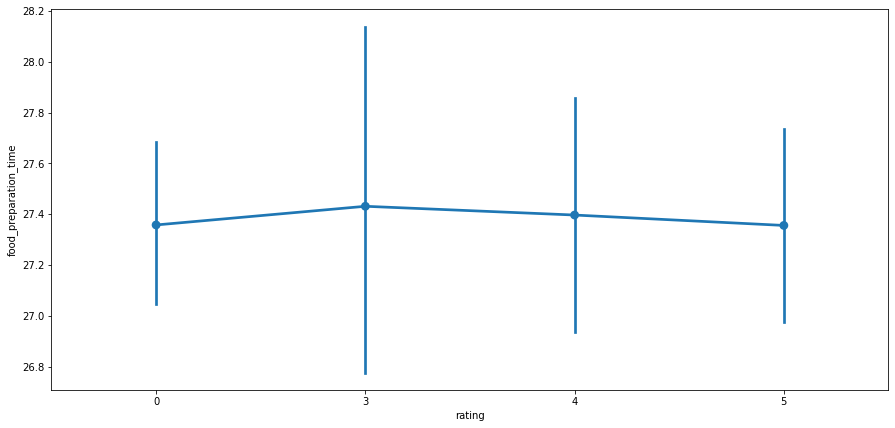

In [405]:
# rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Observation
on rating, food_preparation_time, we can see that orders which took from 26.8 and more than 28.1 were rated as 3 comparing to orders which rated as 5, and starts from 27 and 27.7, still there are not a significant difference


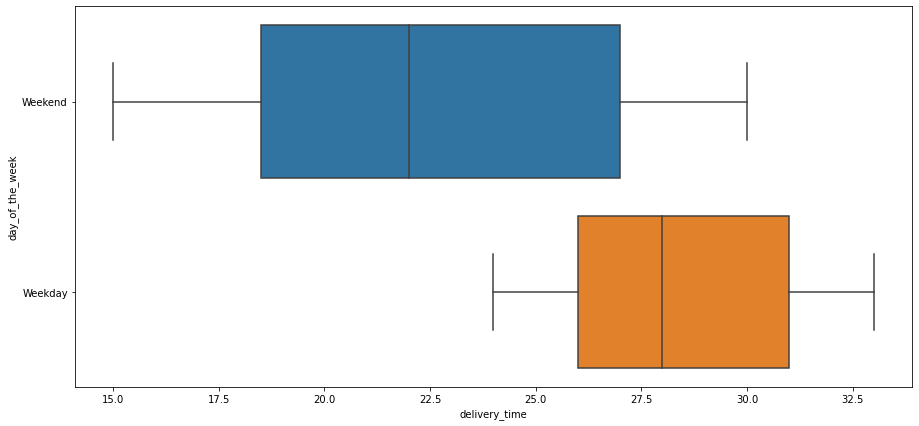

In [409]:
# day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='delivery_time', y = 'day_of_the_week')  
plt.show()

#### Observation on delivery_time and day_of_the_week
During weekend avg delivery time is 22 min and on weekday 28min

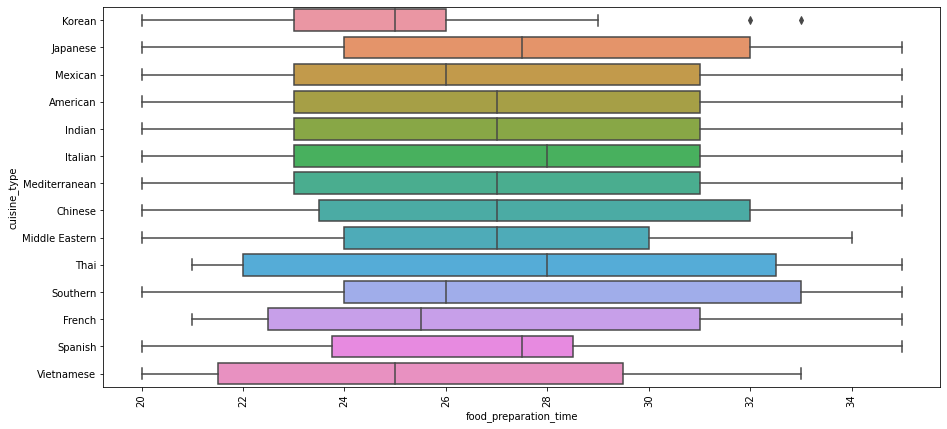

In [413]:
# food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='food_preparation_time', y = 'cuisine_type')  
plt.xticks(rotation = 90)
plt.show()

#### Observation food preparation_time and cuisine type, no strong correlation between
Korean avg 24.5, 
Japanese avg 27.5,
Mexican avg 26,
American avg 27,
Indian avg 27,
Italian avg 28,
Mediteranian avg 27,
Chinese avg 27,
Middle Eastern avg 27,
Thai avg 28,
Southern avg 26,
French avg 25.5,
Spanish 27.5,
Vietnamese 25


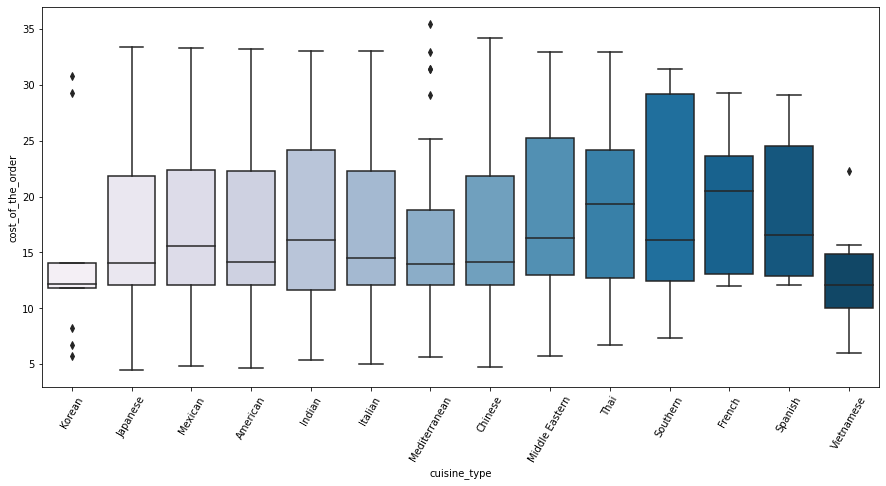

In [414]:
# cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### observation on cuisine_type and cost of the order, no strong correlation
Korean avg 12.5, 
Japanese avg 14.8,
Mexican avg 16,
American avg 14,
Indian avg 16,
Italian avg 14.9,
Mediteranian avg 14.8,
Chinese avg 14.8,
Middle Eastern avg 16,
Thai avg 19,
Southern avg 16,
French avg 22,
Spanish 16,
Vietnamese 12

In [407]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Obsrvation on cost_of_the_order and restaurant_name

Shake and shack has 3579.53, The meatball Shop 2145.21, Blue Ribbon Sushi - 1903.95

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [271]:
df['rating'].head() 

0    Not given
1    Not given
2            5
3            3
4            4
Name: rating, dtype: object

In [632]:
# changed_rat = df['rating'] = df['rating'].replace(['Not given'],np.nan).copy()
# change = df['rating'] = df['rating'].fillna(0)
# change = df['rating'] = df['rating'].astype(int)
changed_rat = df[df['rating'] != 'Not given'].copy()
changed_rat = changed_rat['rating'].astype('int') 

In [572]:
df['rating'].head() 

0    0
1    0
2    5
3    3
4    4
Name: rating, dtype: int32

In [633]:
top_res = df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index().head(10)
top_res

,restaurant_name,rating
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
5,RedFarm Broadway,59
6,RedFarm Hudson,55
7,TAO,49
8,Han Dynasty,46
9,Blue Ribbon Sushi Bar & Grill,44


In [452]:
#rating more than 50
res_fif = top_res.loc[top_res['rating']> 50]['restaurant_name'].head(10)
res_fif


0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
4                         Parm
5             RedFarm Broadway
6               RedFarm Hudson
Name: restaurant_name, dtype: object

In [ ]:
# meanr = top_res.groupby(['restaurant_name'])['rating'].mean()
# meanfour = meanr.loc[meanr['rating']> 4]['restaurant_name']


In [634]:
new_rest = changed_rat[changed_rat['restaurant_name'].isin(res_fif)].copy()
new_rest

KeyError: 'restaurant_name'

In [620]:
meanr = df.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

### Observation
First I found restaurants with ratings more than 50:
0   Shake Shack	219
1	The Meatball Shop	132
2	Blue Ribbon Sushi	119
3	Blue Ribbon Fried Chicken	96
4	Parm	68
5	RedFarm Broadway	59
6	RedFarm Hudson	55
And then we checked if these restaurant has mean 4:
restaurant_name	rating
0	RedFarm Broadway	2.949153
1	Blue Ribbon Fried Chicken	2.885417
2	The Meatball Shop	2.871212
3	Shake Shack	2.598174
4	Blue Ribbon Sushi	2.588235
5	RedFarm Hudson	2.581818
6	Parm	2.367647

As we can see zero restaurants fulfilling the criteria, so none restaurants get the promotional offer

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [426]:
df['cost_of_the_order'].dtypes

dtype('float64')

In [473]:
# Write the code here
# twentyf=df.loc[df['cost_of_the_order']>20].value_counts() 

twenty=df.loc[df['cost_of_the_order']>20].value_counts().sort_values(ascending = False).reset_index()
twenty

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,0
0,1476560,149508,Shake Shack,American,22.26,Weekend,4,32,17,1
1,1476576,297130,Blue Ribbon Sushi,Japanese,31.43,Weekend,5,24,17,1
2,1476571,334758,Melt Shop,American,29.15,Weekend,4,26,17,1
3,1476572,356195,Blue Ribbon Fried Chicken,American,29.15,Weekday,5,20,29,1
4,1476573,370405,Haveli Indian Restaurant,Indian,29.10,Weekday,3,23,24,1
...,...,...,...,...,...,...,...,...,...,...
550,1478423,129969,The Meatball Shop,Italian,21.20,Weekend,0,34,16,1
551,1478429,355090,Shake Shack,American,22.85,Weekend,5,24,23,1
552,1478430,133701,The Loop,Japanese,24.30,Weekend,5,21,29,1
553,1478435,350180,RedFarm Hudson,Chinese,20.32,Weekday,5,30,29,1


In [483]:
res = 0
for ele in df['cost_of_the_order']:
    if ele > 20:
        res = res + ele 

In [477]:
res  #more than 20

14754.91000000001

In [488]:
resfive = 0
for ele in df['cost_of_the_order']:
    if ele > 5 and ele <20:
        resfive = resfive + ele 

In [489]:
resfive #more than 5$ and <20

16517.169999999973

In [ ]:
# or we can create a function and find sum as well as %

In [491]:
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [549]:
# total revenue and print it
total_rev = df['Revenue'].sum() 
print('The net revenue is around', round(total_rev, 2), 'dollars')


The net revenue is around 6166.3 dollars


#### Observation
First we found the restaurants 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars, and then we found the net, and the net revenue is around 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [583]:
# # Write the code here
# #prepared+delivery time
timetot = df['food_preparation_time']+df['delivery_time']

In [584]:
timetot

0       45
1       48
2       51
3       40
4       49
        ..
1893    48
1894    50
1895    55
1896    54
1897    52
Length: 1898, dtype: int64

In [585]:
len(timetot)

1898

In [588]:
tot = 0
for t in timetot:
    if t < 60:
        tot = tot + 1

In [589]:
print(t)

52


In [554]:
tf = len(df['food_preparation_time'])

In [555]:
percfood=(t/tf)*100
percfood

2.73972602739726

#### Observations:
approximately 3% percents of orders takes more than 60 min, 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

<AxesSubplot:xlabel='delivery_time', ylabel='day_of_the_week'>

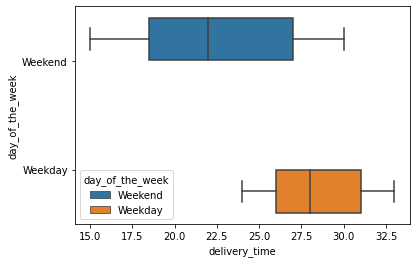

In [556]:
# Write the code here
sns.boxplot(x=df['delivery_time'],
              y=df['day_of_the_week'],
              hue = df['day_of_the_week'])





In [557]:
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes


In [560]:
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekends is around 22 minutes


#### Observations:


The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

<AxesSubplot:xlabel='count', ylabel='cuisine_type'>

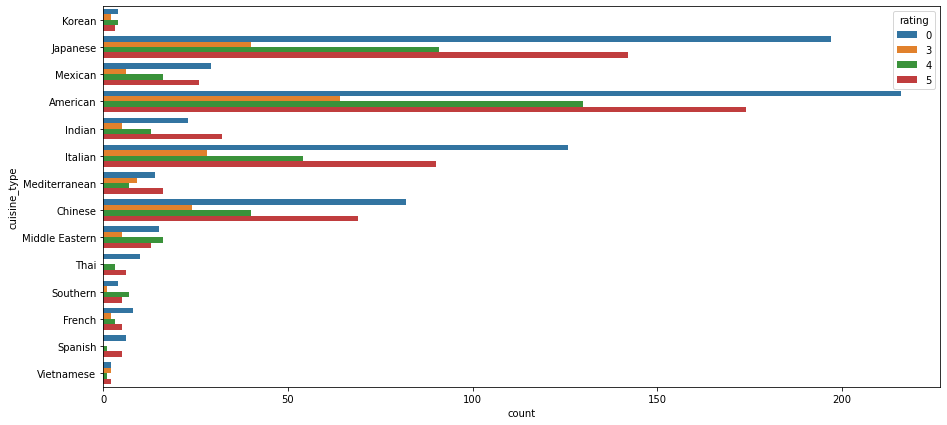

In [564]:
plt.figure(figsize=(15,7))
sns.countplot(y = df['cuisine_type'],
                  hue = df['rating'])

### Conclusions:
* We have analized the data from the food aggregator company, which has stored the data of the different orders made by the registered customers in their online portal,  to get a fair idea about the demand of different restaurants which will help them(the aggregator company) in enhancing their customer experience.

Insights:
1. the minimum time- 20 min, the average time- 27 min, the maximum time- 35 min 
2. There are: 736 orders with - "not given" rating 588 orders with rating 5, 386 orders with rating 4, 188 orders with rating 3 and delivery_time min 15, max 33, 25 - is an avg
4. cost of order:
avg = 14$,
min = 4$, 
max = 35$
5. 14 cuisine types and 178 restaurants, 1898 orders
6. Top 5 restaurants in terms of the number of orders received: Shake Shack 219 orders, The Meatball Shop 132, Blue Ribbon Sushi 119, Blue Ribbon Fried Chicken 96, Parm 68.
7. the most popular cuisine on weekend is American
8. 29% of orders cost more than 20$
9. Mean of delivery_time is 24 min
10. 20% discount will get top 3 frequent customers:
    customer_id     number_of_orders
       52832          13
       47440          10
       83287           9
11. delivery_time and day_of_the_week. During weekend avg delivery time is 22 min and on weekday 28min
12. As we can see zero restaurants fulfilling the criteria, so none restaurants get the promotional offer
13. the net revenue is around 6166.3 dollars
14. approximately 3% percents of orders takes more than 60 min

The most popular cuisine is American, with highest rating of 5, at the same time the highest level of not rated orders, which is a bit confusing. We found that 1200 unique orders out of 1898, are orders from same customers 698 (and not given rate is 736)same with Japanese, Italian and Chinese.

### Recommendations:

*  
1. i would recommend to encouridge customers to give rating to each order, so it will be more clear what clients think about restaurant and service.
2. We know 5 topr restaurants in terms of orders, there can be increased quantity of delivery men, so it would improve delivery time
3. To give the clients discount is a good step
4. During weekend avg delivery time is 22 min and on weekday 28min, which probably depends on the traffic, but if we would keep delivery men near restaurant with top frequent orders we could save few min
5. approximately 3% percents of orders takes more than 60 min, this rating could be improved too
6. 



---